### Coupled burger's-like equations

In [1]:
import functools as ft
import multiprocessing as mp
import logging

import numpy as np
from scipy.signal import gaussian

import pylab as pl

from triflow import Model, Simulation, schemes, displays

%matplotlib inline

We initialize the model with a coupled burger-like system of equations

\begin{align}
    \partial_{t}U &= k \partial_{xx} U - c U \partial_{x} V \\
    \partial_{t}V &= k \partial_{xx} U - c V \partial_{x} U
\end{align}

In [2]:
model = Model(["k * dxxU - c * U * dxV", "k * dxxV - c * V * dxU"],
               ["U", "V"], ["k", "c"])

We discretize our spatial domain. `retstep=True` ask to return the spatial step. We want periodic condition,
so `endpoint=True` exclude the final node (which will be redondant with the
first node, $x=0$ and $x=100$ are merged)

In [3]:
x, dx = np.linspace(0, 100, 500, retstep=True, endpoint=False)

We initialize with cosine and sine function for $U$ and $V$.

In [4]:
U = np.cos(x * 2 * np.pi / x.max() * 5) * .5 + 1
V = np.sin(x * 2 * np.pi / x.max() * 5) * .5 + 1
fields = model.fields_template(x=x, U=U, V=V)

We precise our parameters. The default scheme provide an automatic time_stepping. We set the periodic flag to True.

In [5]:
parameters = dict(k=1, c=10, periodic=True)

We initialize the simulation

In [6]:
t = 0
simulation = Simulation(model, t, fields, parameters,
                        dt=.1, tmax=4, tol=1E-2)

We iterate on the simulation until the end. We update the bokeh display each step.

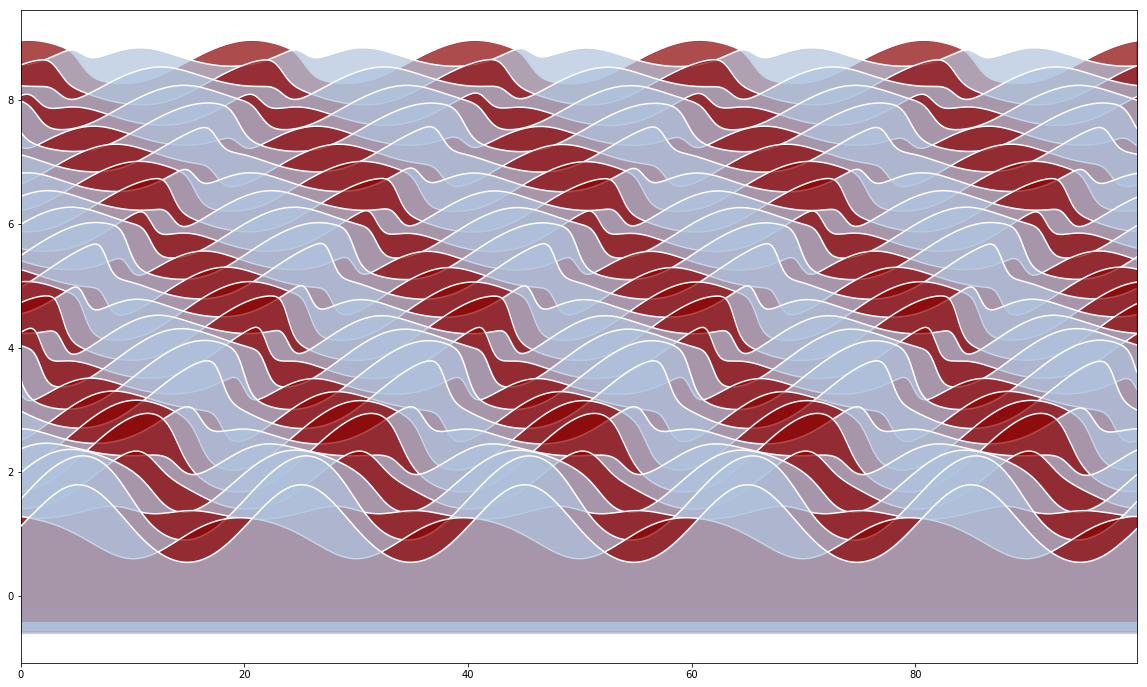

In [7]:
pl.figure(figsize=(20, 12))
for i, (t, fields) in enumerate(simulation):
    if i % 2 == 0:
        pl.fill_between(fields.x, fields.U + .1 * (2 * i),
                        fields.U.min() - 1,
                        color='darkred', zorder=-4 * i, alpha=.7)
        pl.plot(fields.x, fields.U + .1 * (2 * i), 
                color='white',
                zorder=-4 * i + 1)
        pl.fill_between(fields.x, fields.V + .1 * (2 * i + 1),
                        fields.V.min() - 1,
                        color='lightsteelblue', zorder=-4 * i + 2, alpha=.7)
        pl.plot(fields.x, fields.V + .1 * (2 * i + 1), 
                color='white',
                zorder=-4 * i + 3)
    print(f"t: {t:g}".ljust(80), end='\r')
pl.xlim(0, fields.x.max())
pl.show()